# SeismicSource
A simple module for basic seismic source modeling.
Before installing, first resolve all dependencies by installing [ObsPy](https://github.com/obspy/obspy).
# Installation
## General installation 
Start python and run:

In [ ]:
import source

The whole module is then accessible by typing `source.` and TAB.
## Importing the SeismicSource class
Start python and run:

In [ ]:
from source import SeismicSource

The `SeismicSources` class then be used.
# Examples
Examples use `matplotlib`, `mpl_toolkits` and `numpy` libraries (installed with ObsPy). Standard import commands are needed first.

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## One double couple
A model for a pure double couple event on Mxy component is defined with the following six independant tensors:

In [ ]:
dc = np.array([0.,0.,0.,1.,0.,0.]) * 1./np.sqrt(2.) 

An instance of the `SeismicSource` class with such a moment tensor is defined by:

In [ ]:
model_example = SeismicSource(dc)

The radiation pattern of this model, as defined by Aki and Richards (2002) can be viewed with:

In [ ]:
model_example.Aki_Richards.plot(wave='P',style='v')

As defined by Vavryeuk (2001) :

In [ ]:
model_example.Vavryeuk.plot(wave='P',style='v')

Other style of plots can be obtained with option `style`. See `model_example.Aki_Richards.plot?` for details. To get a complete, but busy, view of the wavefield run:

In [ ]:
model_example.Aki_Richards.plot(wave='P',style='*')

## Various source mechanisms
Moment tensor and radiation pattern models can be defined and compared side by side. Condidere the following definitions of the principale moment tensors:

In [25]:
# Scale the moment tensors to 1
c=2
# A linear vector
lv = np.array([0,c/2,0,0.,0.,0.])  
# An isotropic source
iso = np.array([c/2,c/2,c/2,0.,0.,0.]) * 1./np.sqrt(3.) 
# A deviatoric source: pure double couple
dc = np.array([0.,0.,0.,np.sqrt(c),0.,0.]) * 1./np.sqrt(2.) 
# A deviatoric source: pure compensated linear vector dipole
clvd = np.array([-c,c/2,c/2,0.,0.,0.]) * 1./np.sqrt(6.) 

Tensile source are a mix of CLVD and isotropic sources. The models available for a shear-tensile cracks can be visually compared with:

<IPython.core.display.Javascript object>


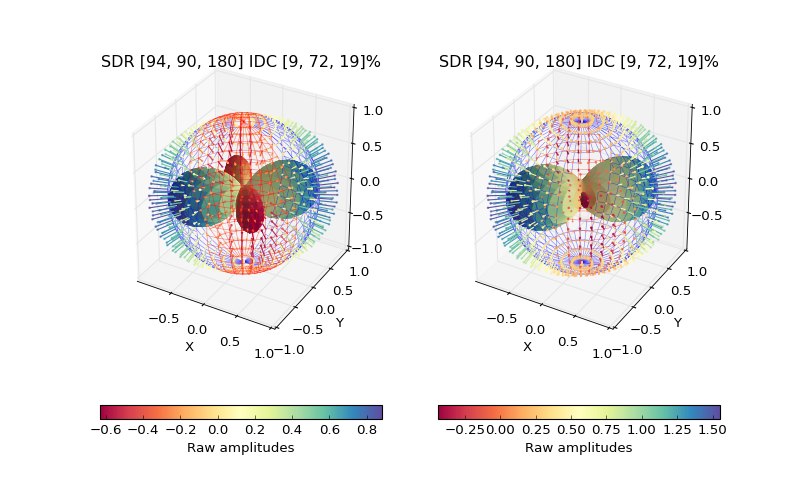

In [27]:
TensileCrack = SeismicSource( dc*3/4 + lv*1/4 )

fig = plt.figure(figsize=plt.figaspect(0.6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')    
TensileCrack.Aki_Richards.plot(wave='P', style='*', ax=ax1)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
TensileCrack.Vavryeuk.plot(wave='P', style='*', ax=ax2)

## Quantitative analysis
A instance of `SeismicSource` is composed of one class for each available source model (namely `Aki_Richards` and `Vavryeuk`). The radiation patterns can be compared quantitatively using the `energy` method built in each class (or source model). 
To investigate the evolution of the S/P energy ratio with tensile component increase : 

<IPython.core.display.Javascript object>


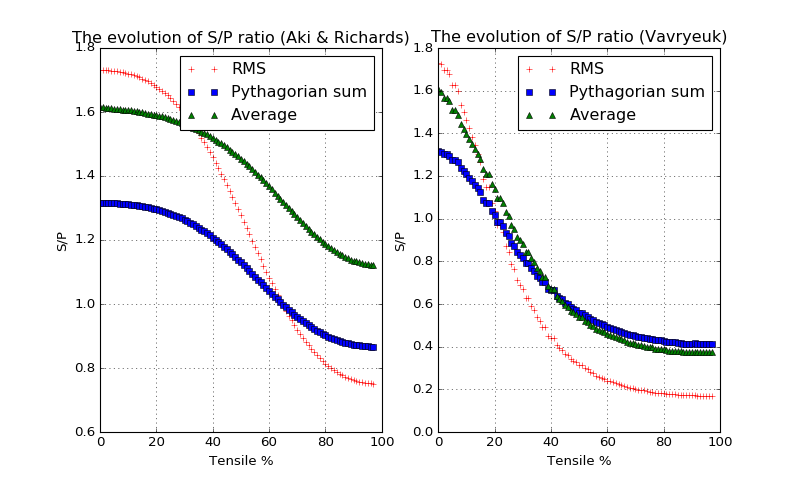

In [28]:
rms=[]
norm=[]
average=[]

rms_v=[]
norm_v=[]
average_v=[]

for x in range(1, 99):    
    example = SeismicSource(dc*(100-x)/100 + lv*x/100)
    
    S = example.Aki_Richards.energy('S')
    P = example.Aki_Richards.energy('P')
    
    S_v = example.Vavryeuk.energy('S')
    P_v = example.Vavryeuk.energy('P')
    
    rms.append(S[0]/P[0])
    norm.append(S[1]/P[1])
    average.append(S[2]/P[2])  
    
    rms_v.append(S_v[0]/P_v[0])
    norm_v.append(S_v[1]/P_v[1])
    average_v.append(S_v[2]/P_v[2]) 

fig = plt.figure(figsize=plt.figaspect(0.6))
plot = fig.add_subplot(1, 2, 1)    
plt.plot(np.arange(98),rms, 'r+', np.arange(98),norm, 'bs', np.arange(98),average, 'g^')
plt.xlabel('Tensile %')
plt.ylabel('S/P')
plt.title('The evolution of S/P ratio (Aki & Richards)')
plt.grid(True)
plt.legend( ["RMS", "Pythagorian sum", "Average" ] )
plt.show()

plot = fig.add_subplot(1, 2, 2)
plt.plot(np.arange(98),rms_v, 'r+', np.arange(98),norm_v, 'bs', np.arange(98),average_v, 'g^')
plt.xlabel('Tensile %')
plt.ylabel('S/P')
plt.title('The evolution of S/P ratio (Vavryeuk)')
plt.grid(True)
plt.legend( ["RMS", "Pythagorian sum", "Average" ] )
plt.show()